<center> <h2> DS 3000 - Fall 2020</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3> Predicting Google Play Store Ratings </h3> </center>
<center><h4> Stanley Wu and Patrick Yoon </h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Our final project focused on analyzing the rating of various applications on the Google Play Store using various characteristics such as the category, number of installs, price, and many more. We collected our data from Kaggle, but a lot of pre-processing was needed to be done before our ML algorithms could be run on them. One of our questions was whether classification our regression would work better in predicting app ratings, so we engineered two datasets to accomplish this task (continuous output for regression, discrete classes for classification). After data preprocessing, we visualized each of our features compared to the rating using either a box plot or a regression plot. Using these visualizations, we conducted our hypothesis tests that developed about our dataset to potentially draw rational conclusions. The main experiment we wished to conduct was whether regression, or classification would perform better in predicting ratings. We found that classification produced better results, while regression results were pretty poor. Within the classification algorithms, we also found that decision tree worked the best, compared to KNN and LinearSVC. This helps affirm that decision trees work better that KNN when feature dimensionality is high, something we encountered in our dataset.



<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

**Problem Statement:**

We want to analyze data about applications from the Google Play Store in order to find the factors that have the most effect on the rating (out of five) presented on the Google Play Store. Potential factors include category, genre, number of installs, and the number of reviews. We plan on using these factors as features to predict the rating of an application. With this, we can learn about which features are more significant in determining the rating and in what way.

**Significance of the Problem:**

As a platform for creating applications for use on phones, there are many features of a Google Play Application, ranging from average rating among users, genre, and download count, to name a few. With phones being such an important part of daily life (and Google Play Store supplying applications to a large majority of phone users), it is important to understand not only how current applications have faired on the market, but also what features distinguish good apps from bad apps, which allow us and developers to hone in on certain features of applications during development to improve user experience and popularity for new applications. 

Another person has conducted a similar experiement has us while using the same dataset from Kaggle. You can click [here](https://www.kaggle.com/jemseow/machine-learning-to-predict-app-ratings) to read about it. This person opted into using three models: linear regression, the SVR model, and the random forest regressor model.

**Questions:**

Given the aforementioned problem and its importance, we set out to tackle the following questions:
- Which process will yield the best results: classification or regression?
    - Using our ratings target variable as continuous values or discretizing them for classification
    - Whether leaving the target as a continuous variable for regression will yield better results than doing some pre-processing to turn this into a classification problem
- Which algorithms will have the easiest time fitting to the data?
    - KNN, decision trees, LinearSVC
- Which algorithm will end up with the highest testing accuracy?
- What is the difference in performance between decision trees and KNN?
    - This is important due to our large number of features being used
    - KNN usually does better on datasets with less features
    - Decision trees might have an easier time because there are more

**Hypothesis:**

For hypothesis testing, we will be testing if a higher number of installs means that the rating is also higher. We will also be testing if a lower number of reviews means that the rating will be higher. By using various classification and regression algorithms, we will be able to answer the questions mentioned above and test our hypothesis. These questions and their respective answers will help us as developers and data analysis to see whether popularity or urge to write a review necessarily constitutes to a higher rating. 


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1 Data Acquisition
We obtained our data from kaggle:
-	https://www.kaggle.com/lava18/google-play-store-apps

This dataset provides information about applications on the Google Play Store. This includes the application name, category, rating (out of 5), number of reviews, size (in M), number of installs, price, content rating, genre, date of last update, current version, and the required android version to run the application. This results in 13 columns. There are exactly 10841 applications in the dataset, resulting in 10841 rows of data.

### 2.2 Data Analysis
In relation to our hypothesis, our independent variables are the ten out of the eleven feature variables stated above: name, category, number of reviews, size (in M), number of installs, price, content rating, genre, date of last update, current version, and the required android version to run the application. Our outcome variable will be the rating, which is a value between 1 and 5. We plan on testing the results between classification (the rating will be a discrete number between 1-5) or regression (the rating will be a continuous number between 1-5).

We deem our feature variables as important predictors as these characteristics define the activity and the quality of an application on the Google Play Store. Features such as genre and category are important as people's rating may change depending on the type of application it functions as. Other features such as the number of installs and reviews may also be important as the average rating may vary more with less number of users using/reviewing it. This is a supervised ML problem because we have our ten features as inputs and mapping it to a single output, the rating. As stated previously, we plan on testing both classification and regression as our target variable allows it. As for the machine learning algorithms, for classification we plan on using Classification K-Nearest Neighbors (KNN), classification decision tree, and LinearSVC model. For regression, we plan on using Regression K-Nearest Neighbors, regression decision tree, and LinearSVR model. We decided on these algorithms as they are comparatively cheap, easy, and quick to implement. Since we are testing so many different algorithms and testing both regression and classification, we want to use algorithms that can evaluate the performance quickly with good accuracy.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling


We import or google play store csv, and show it's initial shape and some of its contents

In [164]:
import pandas as pd

df = pd.read_csv('googleplaystore.csv')
print(df.shape)
df.head()

(10841, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We drop rows that are missing values, and reset the index (this will be important later when we do some joining). We then also remove some features that have little to do comparisons between applications. This includes the version (game dependent), genre (covered in more detail in category), the day it was last updated (game dependent), and size (game dependent). 

In [165]:
df = df.dropna()
df = df.reset_index()
df = df.drop(['index', 'Current Ver', 'Genres', 'Last Updated', 'Size'], axis=1)
df.shape

(9360, 9)

Since we have a lot of categorical columns, we write a function that onehot encodes a given dataframe's specific column as provided, and returns the newly joined dataset with one hot encoded features. We do this for 'Category', 'Type', 'Content Rating', and 'Android Ver'. These are most of our non continuous features. We then do some data massaging to get turn the features 'Installs' and 'Price' into continuous values (they were originally strings with symbols).

In [166]:
from sklearn.preprocessing import OneHotEncoder

def onehot_encode_col(df, col):
    new_df = df[col].values.reshape(-1,1)
    encoder = OneHotEncoder(sparse=False)
    encoded_df = encoder.fit_transform(new_df)
    
    features_df = pd.DataFrame(encoded_df, columns=encoder.get_feature_names())
    df = df.drop([col], axis=1)
    return df.join(features_df)

In [167]:
df['Installs'] = [int(x.replace('+', '').replace(',', '')) for x in df['Installs']]
df['Price'] = [float(x.replace('$', '')) for x in df['Price']]
for col in ['Category', 'Type', 'Content Rating', 'Android Ver']:
    df = onehot_encode_col(df, col)

df.head()

,App,Rating,Reviews,Installs,Price,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,...,x0_5.0 - 6.0,x0_5.0 - 8.0,x0_5.0 and up,x0_5.1 and up,x0_6.0 and up,x0_7.0 - 7.1.1,x0_7.0 and up,x0_7.1 and up,x0_8.0 and up,x0_Varies with device
0,Photo Editor & Candy Camera & Grid & ScrapBook,4.1,159,10000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Coloring book moana,3.9,967,500000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",4.7,87510,5000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Sketch - Draw & Paint,4.5,215644,50000000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Pixel Draw - Number Art Coloring Book,4.3,967,100000,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Since we plan on doing regression AND classification, we make two different sets of training/validation/testing data. In the regression case, we keep the target as a continuous feature, and in the classification case, we split the target ratings into a binary classification (1 for above median value, 0 for less than). This allows us to create a 50 50 split in data, ensuring we won't overfit to one category, and giving us a measurement of above average and below average. For both sets of data, we apply a min max scaler over the continuous features/target (notice we only apply this to the feature in the regression case. 

In [168]:
df_regr = df.copy()

In [169]:
features = df_regr.drop(['App', 'Rating'], axis=1)
target = df['Rating']

In [170]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(features, target, train_size=0.8, random_state=3000)
X_train_regr, X_val_regr, y_train_regr, y_val_regr = train_test_split(X_train_regr, y_train_regr, train_size=0.75, random_state=3000)

#create the scaler
scaler = MinMaxScaler()
scaler.fit(X_train_regr[['Reviews', 'Installs', 'Price']])

X_train_regr[['Reviews', 'Installs', 'Price']] = scaler.transform(X_train_regr[['Reviews', 'Installs', 'Price',]])
X_val_regr[['Reviews', 'Installs', 'Price']] = scaler.transform(X_val_regr[['Reviews', 'Installs', 'Price']])
X_test_regr[['Reviews', 'Installs', 'Price']] = scaler.transform(X_test_regr[['Reviews', 'Installs', 'Price']])

scaler = MinMaxScaler()
scaler.fit(np.array(y_train_regr).reshape(-1, 1))

y_train_regr = scaler.transform(np.array(y_train_regr).reshape(-1, 1)).flatten()
y_val_regr = scaler.transform(np.array(y_val_regr).reshape(-1, 1)).flatten()
y_test_regr = scaler.transform(np.array(y_test_regr).reshape(-1, 1)).flatten()

X_train_regr.head()

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Reviews,Installs,Price,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,x0_COMICS,x0_COMMUNICATION,...,x0_5.0 - 6.0,x0_5.0 - 8.0,x0_5.0 and up,x0_5.1 and up,x0_6.0 and up,x0_7.0 - 7.1.1,x0_7.0 and up,x0_7.1 and up,x0_8.0 and up,x0_Varies with device
2858,2.973734e-03,0.005000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2514,7.946688e-02,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,1.215482e-06,0.000005,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,3.710418e-07,0.000010,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2.334493e-04,0.000100,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As for feature selection, we use Model-Based Feature Selection to select the featuers with most importance based on the DecisionTreeRegressor. Since this dataset will be used for regression, we use a regressor as the model to select features from.

In [171]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

select = SelectFromModel(DecisionTreeRegressor(random_state=3000), threshold='median')
select.fit(X_train_regr, y_train_regr)

#transform training and testing sets so only the selected features are retained
X_train_selected_regr = select.transform(X_train_regr)
X_val_selected_regr = select.transform(X_val_regr)
X_test_selected_regr = select.transform(X_test_regr)

In [172]:
print(features.columns[select.get_support()])

Index(['Reviews', 'Installs', 'Price', 'x0_AUTO_AND_VEHICLES', 'x0_BUSINESS',
       'x0_COMMUNICATION', 'x0_DATING', 'x0_FAMILY', 'x0_FINANCE',
       'x0_FOOD_AND_DRINK', 'x0_GAME', 'x0_HEALTH_AND_FITNESS', 'x0_LIFESTYLE',
       'x0_MEDICAL', 'x0_NEWS_AND_MAGAZINES', 'x0_PERSONALIZATION',
       'x0_PHOTOGRAPHY', 'x0_PRODUCTIVITY', 'x0_SHOPPING', 'x0_SOCIAL',
       'x0_SPORTS', 'x0_TOOLS', 'x0_TRAVEL_AND_LOCAL', 'x0_Paid',
       'x0_Everyone', 'x0_Everyone 10+', 'x0_Teen', 'x0_2.2 and up',
       'x0_2.3 and up', 'x0_2.3.3 and up', 'x0_4.0 and up', 'x0_4.0.3 and up',
       'x0_4.1 and up', 'x0_4.2 and up', 'x0_4.3 and up', 'x0_4.4 and up',
       'x0_5.0 and up', 'x0_Varies with device'],
      dtype='object')


For our classification dataset, we must first transform our continuous features to discrete 1 and 0s. We do this by mapping ratings above the median to 1, and below to 0. Ensuring 50 50 split and giving us a metric of above average and below average apps.

In [173]:
med = df['Rating'].median()

def transform_class(rating):
    if rating < med:
        return 0
    else:
        return 1

target = df['Rating'].apply(transform_class)
target

0       0
1       0
2       1
3       1
4       1
       ..
9355    0
9356    1
9357    1
9358    1
9359    1
Name: Rating, Length: 9360, dtype: int64

Again, we do training/validation/testing split, and again perform a min max scaler over our continuous features, but not the y value this time, since it is no longer continuous.

In [174]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(features, target, train_size=0.8, random_state=3000)
X_train_class, X_val_class, y_train_class, y_val_class = train_test_split(X_train_class, y_train_class, train_size=0.75, random_state=3000)

#create the scaler
scaler = MinMaxScaler()
scaler.fit(X_train_class[['Reviews', 'Installs', 'Price']])

X_train_class[['Reviews', 'Installs', 'Price']] = scaler.transform(X_train_class[['Reviews', 'Installs', 'Price']])
X_val_class[['Reviews', 'Installs', 'Price']] = scaler.transform(X_val_class[['Reviews', 'Installs', 'Price']])
X_test_class[['Reviews', 'Installs', 'Price']] = scaler.transform(X_test_class[['Reviews', 'Installs', 'Price']])

X_train_class.head()

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Stanley Wu\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Reviews,Installs,Price,x0_ART_AND_DESIGN,x0_AUTO_AND_VEHICLES,x0_BEAUTY,x0_BOOKS_AND_REFERENCE,x0_BUSINESS,x0_COMICS,x0_COMMUNICATION,...,x0_5.0 - 6.0,x0_5.0 - 8.0,x0_5.0 and up,x0_5.1 and up,x0_6.0 and up,x0_7.0 - 7.1.1,x0_7.0 and up,x0_7.1 and up,x0_8.0 and up,x0_Varies with device
2858,2.973734e-03,0.005000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2514,7.946688e-02,0.100000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1978,1.215482e-06,0.000005,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
111,3.710418e-07,0.000010,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
414,2.334493e-04,0.000100,0.009975,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, since we are performing classification, we will be using DecisionTreeClassifier to select our features with Model-Based Feature Selection.

In [175]:
from sklearn.tree import DecisionTreeClassifier

select = SelectFromModel(DecisionTreeClassifier(random_state=3000), threshold='median')
select.fit(X_train_class, y_train_class)

#transform training and testing sets so only the selected features are retained
X_train_selected_class = select.transform(X_train_class)
X_val_selected_class = select.transform(X_val_class)
X_test_selected_class = select.transform(X_test_class)

In [176]:
print(features.columns[select.get_support()])

Index(['Reviews', 'Installs', 'Price', 'x0_BOOKS_AND_REFERENCE', 'x0_BUSINESS',
       'x0_COMMUNICATION', 'x0_DATING', 'x0_FAMILY', 'x0_FINANCE', 'x0_GAME',
       'x0_HEALTH_AND_FITNESS', 'x0_LIFESTYLE', 'x0_MAPS_AND_NAVIGATION',
       'x0_MEDICAL', 'x0_NEWS_AND_MAGAZINES', 'x0_PERSONALIZATION',
       'x0_PHOTOGRAPHY', 'x0_PRODUCTIVITY', 'x0_SHOPPING', 'x0_SPORTS',
       'x0_TOOLS', 'x0_TRAVEL_AND_LOCAL', 'x0_Free', 'x0_Everyone',
       'x0_Everyone 10+', 'x0_Mature 17+', 'x0_Teen', 'x0_2.2 and up',
       'x0_2.3 and up', 'x0_2.3.3 and up', 'x0_4.0 and up', 'x0_4.0.3 and up',
       'x0_4.1 and up', 'x0_4.2 and up', 'x0_4.3 and up', 'x0_4.4 and up',
       'x0_5.0 and up', 'x0_Varies with device'],
      dtype='object')


### 3.2. Data Exploration


We have three features that were quantitative data, thus not requiring one-hot encoding. These features are the number of reviews, the number of installs, and the price. Therefore, we plotted each of these features against the rating using a regression plot to visualize any effects.

Text(0.5, 1.0, 'Number of Reviews vs. Rating')

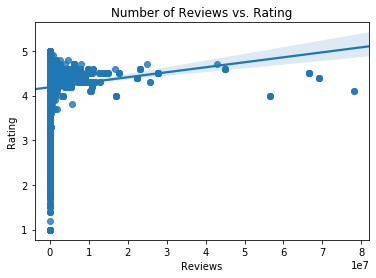

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

regress_df = df.copy()
regress_df['Reviews'] = df['Reviews'].astype('int64')

sns.regplot(data=regress_df, x = "Reviews", y="Rating").set_title("Number of Reviews vs. Rating")

As we can see, there are many outliers to this graph, with very little points past the third tic. This skews the data as it is hard to tell what is going on within the cluster.

Text(0.5, 1.0, 'Number of Reviews vs. Rating')

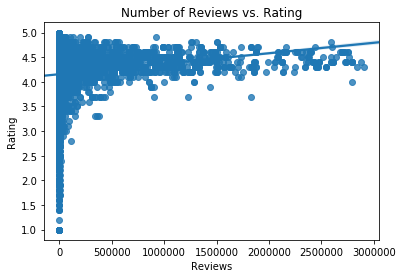

In [178]:
regress_small_df = regress_df.nsmallest(9000, ['Reviews'])
sns.regplot(data=regress_small_df, x = "Reviews", y="Rating").set_title("Number of Reviews vs. Rating")

Looking at the graph closer, we can see that there is a subtle positive relationship between the rating and the number of reviews. Another thing to notice is the range in ratings for when the number of reviews is extremely small. This is likely due to lesser popular apps having varying ratings due to there being such a small number of reviews.

Text(0.5, 1.0, 'Number of Installs vs. Rating')

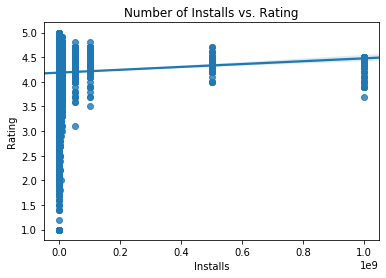

In [179]:
sns.regplot(data=regress_df, x = "Installs", y="Rating").set_title("Number of Installs vs. Rating")

As we can see here, there is also a subtle positive relationship between the number of installs and the rating. This is likely due to more popular applications having much more installs. Similar to the number of ratings, there is a great variance in rating when there are little installs, likely due to the average rating being easily swayed.

Text(0.5, 1.0, 'Price vs. Rating')

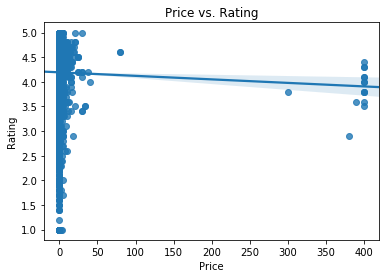

In [180]:
sns.regplot(data=regress_df, x = "Price", y="Rating").set_title("Price vs. Rating")

As we can see here, there is a subtle negative relationship between the price and the rating, but there are also a lot of outliers.

Text(0.5, 1.0, 'Price vs. Rating')

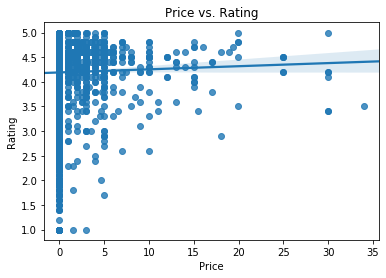

In [181]:
regress_small_df = regress_df.nsmallest(9340, ['Price'])
sns.regplot(data=regress_small_df, x = "Price", y="Rating").set_title("Price vs. Rating")

However, once we zoom in more, we can see that it's hard to distinguish any relationship between the price and rating. Just like the last two, there is a large variance when the prie is at zero.

We have many features that are categorical data, so we had to use one-hot encoding to be able to run a machine learning algorithm through them. In order to visualize their effects onto a graph, we need to know the frequency for each category in the categorical data. We will first visualize the effect of the category of the application on the rating.


Here we create a dictionary for each category and their frequency.

In [182]:
cols = [0, 1, 2, 3, 4] + list(range(38, 77))
category_df = df.drop(df.columns[cols], axis=1)

categories = {}
for category in category_df.columns:
    total = 0
    for i in range(len(category_df)):
        if category_df[category].iloc[i] == 1:
            total += 1
    categories[category] = total
    
categories

{'x0_ART_AND_DESIGN': 61,
 'x0_AUTO_AND_VEHICLES': 73,
 'x0_BEAUTY': 42,
 'x0_BOOKS_AND_REFERENCE': 178,
 'x0_BUSINESS': 303,
 'x0_COMICS': 58,
 'x0_COMMUNICATION': 328,
 'x0_DATING': 195,
 'x0_EDUCATION': 155,
 'x0_ENTERTAINMENT': 149,
 'x0_EVENTS': 45,
 'x0_FAMILY': 1746,
 'x0_FINANCE': 323,
 'x0_FOOD_AND_DRINK': 109,
 'x0_GAME': 1097,
 'x0_HEALTH_AND_FITNESS': 297,
 'x0_HOUSE_AND_HOME': 76,
 'x0_LIBRARIES_AND_DEMO': 64,
 'x0_LIFESTYLE': 314,
 'x0_MAPS_AND_NAVIGATION': 124,
 'x0_MEDICAL': 350,
 'x0_NEWS_AND_MAGAZINES': 233,
 'x0_PARENTING': 50,
 'x0_PERSONALIZATION': 312,
 'x0_PHOTOGRAPHY': 317,
 'x0_PRODUCTIVITY': 351,
 'x0_SHOPPING': 238,
 'x0_SOCIAL': 259,
 'x0_SPORTS': 319,
 'x0_TOOLS': 733,
 'x0_TRAVEL_AND_LOCAL': 226,
 'x0_VIDEO_PLAYERS': 160,
 'x0_WEATHER': 75}

Since there are many categories, we picked the categories with the three highest frequencies.

In [183]:
from collections import Counter 
top_3_categories = Counter(categories).most_common(3)
top_3_categories

[('x0_FAMILY', 1746), ('x0_GAME', 1097), ('x0_TOOLS', 733)]

In [184]:
import plotly.express as px

category_df['Rating'] = df['Rating']

for category_tuple in top_3_categories:
    category = category_tuple[0]
    fig = px.box(category_df, x = category, y = "Rating")
    fig.update_layout (
        title = {'text': category[3:] + ' vs. Rating', 'yanchor': 'top'})

<img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/familybox.png?raw=true" alt="img/familybox.jpg" width=700>
<img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/gamebox.png?raw=true" alt="img/familybox.jpg" width=700>
<img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/toolsbox.png?raw=true" alt="img/familybox.jpg" width=700>

These three box plots display the effect of an application's genre on the rating on the Google Play Store. For each genre, two box plots are displayed. One for the distribution of applications falling under that specific genre and one for the applications that do not fall under that specific genre (This is representative of the one hot encoding we applied). These were the three most frequent categories in our dataset, consisting of Family, Game, and Tools. As we can see, none of the figures above led to a significant diffference in the rating.

Now we will do this with the other features that are one hot encoded: Paid/Free, Content Rating, and Android Version

In [185]:
# Paid/Free
paid_free_df = df.iloc[:, 38:40]

paid_frees = {}
for paid_free in paid_free_df.columns:
    total = 0
    for i in range(len(paid_free_df)):
        if paid_free_df[paid_free].iloc[i] == 1:
            total += 1
    paid_frees[paid_free] = total

top_3_paid_free = Counter(paid_frees).most_common(3)

# Content Rating
content_rating_df = df.iloc[:, 40:46]
content_ratings = {}
for content_rating in content_rating_df.columns:
    total = 0
    for i in range(len(content_rating_df)):
        if content_rating_df[content_rating].iloc[i] == 1:
            total += 1
    content_ratings[content_rating] = total

top_3_content_rating = Counter(content_ratings).most_common(3)

# Android Version
cols = list(range(46))
android_ver_df = df.drop(df.columns[cols], axis=1)

android_vers = {}
for android_ver in android_ver_df.columns:
    total = 0
    for i in range(len(android_ver_df)):
        if android_ver_df[android_ver].iloc[i] == 1:
            total += 1
    android_vers[android_ver] = total
    
top_3_android_ver = Counter(android_vers).most_common(3)

In [186]:
paid_free_df['Rating'] = df['Rating']
content_rating_df['Rating'] = df['Rating']
android_ver_df['Rating'] = df['Rating']

for paid_free_tuple in top_3_paid_free:
    paid_free = paid_free_tuple[0]
    fig = px.box(paid_free_df, x = paid_free, y = "Rating")
    fig.update_layout (
        title = {'text': paid_free[3:] + ' vs. Rating', 'yanchor': 'top'})
    
for content_rating_tuple in top_3_content_rating:
    content_rating = content_rating_tuple[0]
    fig = px.box(content_rating_df, x = content_rating, y = "Rating")
    fig.update_layout (
        title = {'text': content_rating[3:] + ' vs. Rating', 'yanchor': 'top'})
    
for android_ver_tuple in top_3_android_ver:
    android_ver = android_ver_tuple[0]
    fig = px.box(android_ver_df, x = android_ver, y = "Rating")
    fig.update_layout (
        title = {'text': android_ver[3:] + ' vs. Rating', 'yanchor': 'top'})

<table>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/freebox.png?raw=true" alt="img/freebox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/paidbox.png?raw=true" alt="img/paidbox.png" width=600>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/everyonebox.png?raw=true" alt="img/everyonebox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/teenbox.png?raw=true" alt="img/teenbox.png" width=600>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/maturebox.png?raw=true" alt="img/maturebox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/4.1box.png?raw=true" alt="img/4.1box.png" width=600>
        </td>
    </tr>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/variesbox.png?raw=true" alt="img/variesbox.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/4.0.3box.png?raw=true" alt="img/4.0.3box.png" width=600>
        </td>
    </tr>
</table>

As we can see again, none of the features by themselves have a significance difference on the rating.

### 3.3. Model Construction

#### Hypothesis Test

We will be conducting two separate hypothesis test on the relationship between Installs and Rating and Reviews and Rating. We decided to conduct a One-Way ANOVA test. In order to conduct this test, we need to make the ratings discrete. Here below, we prepare our dataframe for the hypothesis tests.

In [187]:
install_df = pd.DataFrame(columns = ["App", "Installs", "Rating"])
install_df["App"] = df["App"]
install_df["Installs"] = df["Installs"]
install_df["Rating"] = df["Rating"].apply(lambda x: int(x))

install_df

,App,Installs,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,10000,4
1,Coloring book moana,500000,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",5000000,4
3,Sketch - Draw & Paint,50000000,4
4,Pixel Draw - Number Art Coloring Book,100000,4
...,...,...,...
9355,FR Calculator,500,4
9356,Sya9a Maroc - FR,5000,4
9357,Fr. Mike Schmitz Audio Teachings,100,5
9358,The SCP Foundation DB fr nn5n,1000,4


In [188]:
review_df = pd.DataFrame(columns = ["App", "Reviews", "Rating"])
review_df["App"] = df["App"]
review_df["Reviews"] = df["Reviews"].astype('int64')
review_df["Rating"] = df["Rating"].apply(lambda x: int(x))

review_df

,App,Reviews,Rating
0,Photo Editor & Candy Camera & Grid & ScrapBook,159,4
1,Coloring book moana,967,3
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",87510,4
3,Sketch - Draw & Paint,215644,4
4,Pixel Draw - Number Art Coloring Book,967,4
...,...,...,...
9355,FR Calculator,7,4
9356,Sya9a Maroc - FR,38,4
9357,Fr. Mike Schmitz Audio Teachings,4,5
9358,The SCP Foundation DB fr nn5n,114,4


Now we can create a dataset with the descriptive statistics for each of the ratings.

In [189]:
descriptives_installs = install_df.groupby("Rating").agg(["count", "mean", "std", "sem"])
descriptives_installs = descriptives_installs["Installs"]

descriptives_installs

,count,mean,std,sem
Rating,,,,
1,56,2.065134e+04,7.062855e+04,9.438137e+03
2,231,1.150723e+05,4.968414e+05,3.268976e+04
3,1710,5.458339e+06,5.959994e+07,1.441278e+06
4,7089,2.232534e+07,1.002981e+08,1.191243e+06
5,274,3.285511e+02,8.373118e+02,5.058385e+01


In [190]:
descriptives_reviews = review_df.groupby("Rating").agg(["count", "mean", "std", "sem"])
descriptives_reviews = descriptives_reviews["Reviews"]

descriptives_reviews

,count,mean,std,sem
Rating,,,,
1,56,187.160714,5.012819e+02,66.986608
2,231,1126.471861,7.440650e+03,489.558855
3,1710,24796.440936,1.685116e+05,4075.037975
4,7089,673140.211031,3.598545e+06,42739.990109
5,274,8.740876,1.617494e+01,0.977164


Here we can see the various descriptive statistics for each rating. This is for both installs and reviews.

Now, we can start visualizing these statistics using a bar graph.

In [191]:
descriptives_installs.reset_index(inplace=True)
descriptives_reviews.reset_index(inplace=True)

descriptives_installs

,Rating,count,mean,std,sem
0,1,56,2.065134e+04,7.062855e+04,9.438137e+03
1,2,231,1.150723e+05,4.968414e+05,3.268976e+04
2,3,1710,5.458339e+06,5.959994e+07,1.441278e+06
3,4,7089,2.232534e+07,1.002981e+08,1.191243e+06
4,5,274,3.285511e+02,8.373118e+02,5.058385e+01


In [192]:
graph_installs = px.bar(descriptives_installs, x = "Rating", y = "mean", error_y = "sem", template='none', width=500, labels = {"mean": "Number of Installs", "Rating": "Rating"})

graph_installs.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_installs.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_installs.update_layout(title = {'text': "Number of Installs per Rating"})


graph_reviews = px.bar(descriptives_reviews, x = "Rating", y = "mean", error_y = "sem", template='none', width=500, labels = {"mean": "Number of Reviews", "Rating": "Rating"})

graph_reviews.update_xaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_reviews.update_yaxes(title_font={"size":16}, tickfont = {"size":14, "color":"gray"})
graph_reviews.update_layout(title = {'text': "Number of Reviews per Rating"})



<table>
    <tr>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/installsbar.png?raw=true" alt="img/installsbar.png" width=600>
        </td>
        <td>
            <img src="https://raw.githubusercontent.com/yoonpatrick3/ds3000-fp/main/img/reviewsbar.png?raw=true" alt="img/reviewsbar.png" width=600>
        </td>
    </tr>
</table>

Now that we have visualized the data, we can start conducting the F-Test to evaluate our data.

In [193]:
from scipy import stats

installs_1 = install_df[install_df["Rating"] == 1]["Installs"]
installs_2 = install_df[install_df["Rating"] == 2]["Installs"]
installs_3 = install_df[install_df["Rating"] == 3]["Installs"]
installs_4 = install_df[install_df["Rating"] == 4]["Installs"]
installs_5 = install_df[install_df["Rating"] == 5]["Installs"]

groups_installs = [installs_1, installs_2, installs_3, installs_4, installs_5]

reviews_1 = review_df[review_df["Rating"] == 1]["Reviews"]
reviews_2 = review_df[review_df["Rating"] == 2]["Reviews"]
reviews_3 = review_df[review_df["Rating"] == 3]["Reviews"]
reviews_4 = review_df[review_df["Rating"] == 4]["Reviews"]
reviews_5 = review_df[review_df["Rating"] == 5]["Reviews"]

groups_reviews = [reviews_1, reviews_2, reviews_3, reviews_4, reviews_5]

results_installs = stats.f_oneway(*groups_installs)
f_stat_installs = results_installs[0]
p_val_installs = results_installs[1]

print("F-statistic for Installs", format(f_stat_installs, '.2f'))
print("P-value for Installs", format(p_val_installs, '.2f'))

results_reviews = stats.f_oneway(*groups_reviews)
f_stat_reviews = results_reviews[0]
p_val_reviews = results_reviews[1]

print("\nF-statistic for Reviews", format(f_stat_reviews, '.2f'))
print("P-value for Reviews", format(p_val_reviews, '.2f'))

F-statistic for Installs 17.60
P-value for Installs 0.00

F-statistic for Reviews 18.76
P-value for Reviews 0.00


Now we must calculate the degrees of freedom for both groups in order to use them for later evaluations

In [194]:
df1_installs = len(descriptives_installs) - 1
df2_installs = 0

for group in groups_installs:
    df2_installs += (len(group) - 1)

print("df1 for Installs:", df1_installs)
print("df2 for Installs:", df2_installs)

df1_reviews = len(descriptives_reviews) - 1
df2_reviews = 0

for group in groups_reviews:
    df2_reviews += (len(group) - 1)

print("df1 for Reviews:", df1_reviews)
print("df2 for Reviews:", df2_reviews)

df1 for Installs: 4
df2 for Installs: 9355
df1 for Reviews: 4
df2 for Reviews: 9355


Before moving forward, we need to conduct two assumption checks for each test: the check for equality of variances and the check for normality. Here is the check for equality of variances:

In [195]:
levene_results_installs = stats.levene(*groups_installs)
print(levene_results_installs)

levene_results_reviews = stats.levene(*groups_reviews)
print(levene_results_reviews)

LeveneResult(statistic=17.331581104688066, pvalue=3.5529510578722434e-14)
LeveneResult(statistic=18.637480369218586, pvalue=2.8537100534479524e-15)


Since both p-values are less than 0.05, both assumption checks fail. Now we check normality:

In [196]:
print("Installs:")
for i in range(len(groups_installs)):
    print("\tRating", i+1, stats.shapiro(groups_installs[i]), "\n")
    
print("Reviews:")
for i in range(len(groups_reviews)):
    print("\tRating", i+1, stats.shapiro(groups_reviews[i]), "\n")

Installs:
	Rating 1 (0.30269527435302734, 7.612390129059857e-15) 

	Rating 2 (0.21413445472717285, 4.503244002519923e-30) 

	Rating 3 (0.05598461627960205, 0.0) 

	Rating 4 (0.20740395784378052, 0.0) 

	Rating 5 (0.330822229385376, 1.9975241331206778e-30) 

Reviews:
	Rating 1 (0.4078948497772217, 1.1124462489424738e-13) 

	Rating 2 (0.11550748348236084, 1.898537399530024e-31) 

	Rating 3 (0.10504364967346191, 0.0) 

	Rating 4 (0.16428852081298828, 0.0) 

	Rating 5 (0.45398974418640137, 4.207868520476938e-28) 



C:\Users\Stanley Wu\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning:

p-value may not be accurate for N > 5000.



Our assumption checks failed for both tests. No p-values were above 0.05. The one-way ANOVA is said to be robust enough to handle the violations of assumption of normality. However, we cannot proceed with the analysis as it did not pass our assumpion of for equality of variances.

#### Conclusions for Hypothesis Tests
**Installs**

A one-way analysis of variance (ANOVA) was conducted to examine the effect of an application's rating on its number of installs. We ran our test on applications from a Google Play Store using a dataset, thus these applications and their respective number of installs were randomly chosen.

The results were inconclusive. The F-test results were F(4, 9355) = 17.60, p < 0.05. This result may deem the difference as statistically significant. However, the data failed both the assumption check for equality of variance and the assumption check for normality. The assumption check for normality may allow us to continue our test due to the one-way ANOVA being robust enough. However, we decided to not proceed with our test due to the test not passing the assumption check for equality of variance. Therefore, we did not conduct any post-hoc tests on this data. Since the results are inconclusive, they do not indicate anything about our data.

**Reviews**

A one-way analysis of variance (ANOVA) was conducted to examine the effect of an application's rating on its number of reviews. We ran our test on applications from a Google Play Store using a dataset, thus these applications and their respective number of reviews were randomly chosen.

The results were inconclusive. The F-test results were F(4, 9355) = 18.76, p < 0.05. This result may deem the difference as statistically significant. However, the data failed both the assumption check for equality of variance and the assumption check for normality. The assumption check for normality may allow us to continue our test due to the one-way ANOVA being robust enough. However, we decided to not proceed with our test due to the test not passing the assumption check for equality of variance. Therefore, we did not conduct any post-hoc tests on this data. Since the results are inconclusive, they do not indicate anything about our data.

**Initial Models**

We start with regression, using KNeighborsRegressor with default parameters. 

In [197]:
from sklearn.neighbors import KNeighborsRegressor
knnr = KNeighborsRegressor()
knnr.fit(X=X_train_selected_regr, y=y_train_regr)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

Again on regression, we use DecisionTreeRegressor with default parameters.

In [198]:
dtr = DecisionTreeRegressor()
dtr.fit(X=X_train_selected_regr, y=y_train_regr)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Finally for regression, we use LinearSVR with default parameters. 

In [199]:
from sklearn.svm import LinearSVR
lsvr = LinearSVR(max_iter=10000)
lsvr.fit(X=X_train_selected_regr, y=y_train_regr)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=10000,
          random_state=None, tol=0.0001, verbose=0)

Now we move onto classification, first up is KNeighborsClassifier, with default parameters.

In [200]:
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier()
knnc.fit(X=X_train_selected_class, y=y_train_class)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

We move onto Decision Tree Classifier with default parameters, with default parameters.

In [201]:
dtc = DecisionTreeClassifier()
dtc.fit(X=X_train_selected_class, y=y_train_class)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The final classifier we look at is LinearSVC. We try this with default parameters, with default parameters.

In [202]:
from sklearn.svm import LinearSVC
lsvc = LinearSVC()
lsvc.fit(X=X_train_selected_class, y=y_train_class)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

### 3.4. Model Evaluation

**Hypothesis Tests**

As for our hypothesis tests, results were inconclusive. Since the F-stats in both hypothesis test were very large, both p values were less than 0.05. While this may indicate a significant difference, the data was not able to pass the assumption check for equality of variance and the assumption check for normality. Since a one-way ANOVA test is robust enough, we may be able to ignore the fail in the assumption check for normality. However, we cannot bypass the fail in the assumption check for equality of variance. This fail is likely due to our dataset having a significant difference in number of applications per rating, resulting in different variances for each rating category. Therefore, results did not indicate whether there was a positive relationship between the number of installs and rating nor a negative relationship between the number of reviews and rating.

**Model Evaluation on Training and Validation**

First, we construct some functions that we will use to evaluate our model. We use r2 score and mean squared error for regression, and prediction accuracy for classicitaion. Since we are doing regression, MSE makes sense since it just returns the summation of squared differences between predicetd and expected. The higher this value, the worse the model is. Another metric used for regression is r2, which measures how close our predictions are to the actual data. In this metric, we want a value closer to 1 for a good regressor.

In [203]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def report_regression_scores(model, X, y, set_type):
    predicted = model.predict(X)
    print(set_type + ' set MSE with best parameters: ', mean_squared_error(predicted, y)) 
    print(set_type + ' set r2 with best parameters: ', r2_score(predicted, y) )
    
def report_classificationn_scores(model, X, y, set_type):
    print(set_type + ' set accuracy score with best parameters: ', model.score(X, y)) 

For KNeighborsRegressor, our r2 value is very low for training and validation, indicating a poor regressor. However the MSE is quite low, likely a biproduct of the scaled featuers that we employed in data preprocessing. However since r2 score is very low, we can't conclude that this was a good model.

In [204]:
print('KNeighborsRegressor :')
report_regression_scores(knnr, X_train_selected_regr, y_train_regr, 'Training')
report_regression_scores(knnr, X_val_selected_regr, y_val_regr, 'Validation')

KNeighborsRegressor :
Training set MSE with best parameters:  0.01131667111823362
Training set r2 with best parameters:  -0.9675168529904441
Validation set MSE with best parameters:  0.01817124732905983
Validation set r2 with best parameters:  -2.4697445644924643


For DecisionTreeRegressor, again, our r2 value is very low for training and validation, indicating a poor regressor. However the MSE is quite low, likely a biproduct of the scaled featuers that we employed in data preprocessing. However since r2 score is very low, we can't conclude that this was a good model either.

In [205]:
print('DecisionTreeRegressor:')
report_regression_scores(dtr, X_train_selected_regr, y_train_regr, 'Training')
report_regression_scores(dtr, X_val_selected_regr, y_val_regr, 'Validation')

DecisionTreeRegressor:
Training set MSE with best parameters:  0.001588869765903019
Training set r2 with best parameters:  0.8957036629527886
Validation set MSE with best parameters:  0.025187372360807904
Validation set r2 with best parameters:  -0.5503945596256945


Finally for LinearSVR regressor, once again, our r2 value is very low for training and validation, indicating a poor regressor. However the MSE is quite low, likely a biproduct of the scaled featuers that we employed in data preprocessing. However since r2 score is very low, we can't conclude that this was a good model either.

In [206]:
print('LinearSVR:')
report_regression_scores(lsvr, X_train_selected_regr, y_train_regr, 'Training')
report_regression_scores(lsvr, X_val_selected_regr, y_val_regr, 'Validation')

LinearSVR:
Training set MSE with best parameters:  0.016788813110987184
Training set r2 with best parameters:  -23.069431844623008
Validation set MSE with best parameters:  0.017045813175941723
Validation set r2 with best parameters:  -23.958985622779963


Moving onto classificatin. For these metrics, we're going to just use accuracy, i.e. the percentage of points predicted correctly by the model. We want this value as high as possible. We start off with KNeighborsClassifier with default parameters. This time, we get much better results than compared to regression. Training accuracy is around 75%, but validation is at around 60%, indicating that there is some overfitting. We will address this when we optimize the model.

In [207]:
print('KNeighborsClassifier:')
report_classificationn_scores(knnc, X_train_selected_class, y_train_class, 'Training')
report_classificationn_scores(knnc, X_val_selected_class, y_val_class, 'Validation')

KNeighborsClassifier:
Training set accuracy score with best parameters:  0.7540954415954416
Validation set accuracy score with best parameters:  0.5961538461538461


Next is DecisionTreeClassifier. This time we get very high accuracy, enaerly 100% (expected due to our high number of parameters), and again a much lower validation accuracy, indicating that we are overfitting. We will address this when we optimize the model.

In [208]:
print('DecisionTreeClassifier:')
report_classificationn_scores(dtc, X_train_selected_class, y_train_class, 'Training')
report_classificationn_scores(dtc, X_val_selected_class, y_val_class, 'Validation')

DecisionTreeClassifier:
Training set accuracy score with best parameters:  0.9804131054131054
Validation set accuracy score with best parameters:  0.6607905982905983


Finally LinearSVC. While it does around as good as KNN on the validation set, the lower training set score indicates this likely won't be as good as KNN or Decision Tree, but at least it doesn't overfit as strongly as the other two initially. Again, we will hyper parameter tune this later for better performance.

In [209]:
print('LinearSVC:')
report_classificationn_scores(lsvc, X_train_selected_class, y_train_class, 'Training')
report_classificationn_scores(lsvc, X_val_selected_class, y_val_class, 'Validation')

LinearSVC:
Training set accuracy score with best parameters:  0.604522792022792
Validation set accuracy score with best parameters:  0.5822649572649573


Our initial conclusions can be used to answer our ML questions here. We wanted to find out whether classification or regression performed better, and it seems like classification does a lot better than regression. In addition, we thought that decision tree would do better than knn because of the large number of features, and this turned out to be true as well. we continue below to hyper parameter tune our models and see if these conclusions hold.

### 3.5. Model Optimization

We have found that classification seems to work a lot better than regression, so we will stick to classification. Here, we employ grid search to find the best parameters for our three classification models. First we look at n_neighbors, it uses default neighbors at 5, but this was overfitting originally. So likely what should happen is less neighbors does better (less overfitting). In this case, we see that this is true. GridSearchCV picked 3 as the best parameter for neighbors. We have improved our training set score by 6% and also the validation by a bit.

In [210]:
from sklearn.model_selection import GridSearchCV

def grid_search_KNN_classifier():
    param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17]}
    grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_class, y=y_train_class)
    
    print("Best parameters: ", grid_search.best_params_)
    report_classificationn_scores(grid_search, X_train_selected_class, y_train_class, 'Training')
    report_classificationn_scores(grid_search, X_val_selected_class, y_val_class, 'Validation')
    return grid_search
knn_class = grid_search_KNN_classifier()

Best parameters:  {'n_neighbors': 3}
Training set accuracy score with best parameters:  0.8173076923076923
Validation set accuracy score with best parameters:  0.6047008547008547


For decision tree classifier, we also want to prevent overfitting. This was very evident in the default parameters case where there was no max depth, which meant our model was completely overfit to the data. We find that max_depth of 16 works the best. Although training set accuracy decreased from 98% to 84%, our validation score went up by 5%. 

In [211]:
def grid_search_decision_tree_classifier():
    param_grid = {'max_depth': [1, 2, 4, 8, 16, 32, 64, 128]}
    grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_class, y=y_train_class)
    
    print("Best parameters: ", grid_search.best_params_)
    report_classificationn_scores(grid_search, X_train_selected_class, y_train_class, 'Training')
    report_classificationn_scores(grid_search, X_val_selected_class, y_val_class, 'Validation')
    return grid_search
decision_tree_class = grid_search_decision_tree_classifier()

Best parameters:  {'max_depth': 32}
Training set accuracy score with best parameters:  0.9761396011396012
Validation set accuracy score with best parameters:  0.6613247863247863


For our last classification approach: LinearSVC, overfitting wasn't the issue, but overall model performance was not great. So here, we try to find the best C value in order to get the best performance. Originally set to 1, we find that this was already the best value, so it seems this is the best LinearSVC can do on our data.

In [212]:
def grid_search_linearSVC():
    param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    grid_search = GridSearchCV(LinearSVC(max_iter=1000000), param_grid, cv=5)
    grid_search.fit(X=X_train_selected_class, y=y_train_class)
    
    print("Best parameters: ", grid_search.best_params_)
    report_classificationn_scores(grid_search, X_train_selected_class, y_train_class, 'Training')
    report_classificationn_scores(grid_search, X_val_selected_class, y_val_class, 'Validation')
    return grid_search
linear_svc = grid_search_linearSVC()

Best parameters:  {'C': 1}
Training set accuracy score with best parameters:  0.604522792022792
Validation set accuracy score with best parameters:  0.5822649572649573


### 3.6. Model Testing


Now that we have our tuned models (on classification since we found those worked the best), we can now report how well they do on the testing set.

In [213]:
print('KNN Classification Model Evaluation')
report_classificationn_scores(knn_class, X_train_selected_class, y_train_class, 'Training')
report_classificationn_scores(knn_class, X_val_selected_class, y_val_class, 'Validation')
report_classificationn_scores(knn_class, X_test_selected_class, y_test_class, 'Testing')

KNN Classification Model Evaluation
Training set accuracy score with best parameters:  0.8173076923076923
Validation set accuracy score with best parameters:  0.6047008547008547
Testing set accuracy score with best parameters:  0.6298076923076923


In [214]:
print('Decision Tree Classification Model Evaluation')
report_classificationn_scores(decision_tree_class, X_train_selected_class, y_train_class, 'Training')
report_classificationn_scores(decision_tree_class, X_val_selected_class, y_val_class, 'Validation')
report_classificationn_scores(decision_tree_class, X_test_selected_class, y_test_class, 'Testing')

Decision Tree Classification Model Evaluation
Training set accuracy score with best parameters:  0.9761396011396012
Validation set accuracy score with best parameters:  0.6613247863247863
Testing set accuracy score with best parameters:  0.6591880341880342


In [215]:
print('Linear SVC Classification Model Evaluation')
report_classificationn_scores(linear_svc, X_train_selected_class, y_train_class, 'Training')
report_classificationn_scores(linear_svc, X_val_selected_class, y_val_class, 'Validation')
report_classificationn_scores(linear_svc, X_test_selected_class, y_test_class, 'Testing')

Linear SVC Classification Model Evaluation
Training set accuracy score with best parameters:  0.604522792022792
Validation set accuracy score with best parameters:  0.5822649572649573
Testing set accuracy score with best parameters:  0.5966880341880342


The best model appears to be Decision Tree! We have come to the conclusion that classification algorithms seem to perform a lot better on this dataset than regression. In addition, due to the large number of features (partly due to one hot encoding), decision tree classifier had the best performance all around. Note this is because KNN does better with less dimensionality of data, and decision tree does better because it can split moer easily. Evidently there's some overfitting, which we have attempted to remove, but this seems to be the best we can do with predicting ratings on apps!

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION

In broad terms, we looked at two things: classification vs. regression. We wanted to see which would perform better on our dataset (two different datasets with same features, different target). In the end, classification is undoubtedly the winner. For regression, we used KNN regressor, decision tree regressor, and linearSVR, which all performed poorly even with scaled, and one hot encoded features. For classification, we used KNN, decision tree and linearSVC, which performed ok, all having at least 60% accuracy on the training set, with KNN and decision tree performing the best in all. However in the end, do the large amount of features that we have, decision tree classification revealed the best performance on our dataset. This makes sense since our dataset had a lot of features (good for splitting in decision tree). If you had to use a model, this would be the route to take. That being said, with validation and testing scores of 65% at best, this data set does not seem to do very well in predicting ratings (even binary ratings 'good', 'bad') of google play store applications. The best it can do is give a better than 50% chance of predicting correctly. This is something a naked eye could likely do as well with relatively same success.

Our hypothesis was on testing the relationship between the number of installs vs. the rating and the number of reviews vs. the rating. However, from the results of our hypothesis test we were not able to conclude anything. While our F-test results led us to believe there was a significant difference, we were not able to further test this due to our data not passing the assumption check for equality of variance and normality. Therefore, we could not conclude that the higher number of installs or lower number of reviews results in a higher rating. The fail in the assumption check for equality of variance and normality was likely due to each rating having a wildly different amount of applications. There were far more applications with a 3 or 4 rating compared to the other ratings. Due to this, the number of reviews and installs varied much more in the 3-4 rating, resulting in a failed assumption check for equality of variance or normality.

In conclusion, as developers, we learned that it is very hard to predict how consumers rate things just based on application features such as installs, category ... etc. While an application may have a ton of installs, that doens't necessarily correlate with high ratings. The same goes with certain categories. It is often the case that there is "one" very good application per combination of these features, making it tough to decide a trend with just this data. Now one thing that may be interesting to look at in the future, is to gather sentiment analysis data (or do it ourselves) on reviews of each application, and then predict whether or not this application has good ratings or not. Taking this further, we can use this sentiment data and decide whether or not this application should be invested in, or is in a category that might benefit from more apps. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

### CONTRIBUTIONS

**Stanley Wu**

I performed data wrangling and preprocessing (3.1), as well as created the models (3.3), evaluated the models (3.4), optimized the models (3.5), and tested the final models (3.6). I also wrote the first and last paragraph of the discussion (4).

**Patrick Yoon**

I wrote the introduction (1), data analysis (2.1), and data acquisition (2.2). I also wrote the data exploration (3.2) with explanations and created all the plots and graphs. Finally, in model construction (3.3), I conducted both hypothesis tests with a step-by-step instructions, including the plots and the conclusion. I wrote the second paragraph in the discussion (4).